## EECS 731 Project 3: Weekend movie trip

In this project, I will be reading from [movie-based datasets](http://files.grouplens.org/datasets/movielens/ml-latest-small.zip) and performing clustering in order to find movies that are similar to one another. In particular, I will look into how the average ratings and individual genres for each movie affects the resulting clusters generated.

In addition to the above link, the datasets I used can also be found in the data/raw/ directory.

### Python Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import MeanShift
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

### Clustering Model Creation

For this project, I will be evaluating the following five clustering model approaches:

- K-Means
- Expectation-Maximization (GMM)
- Mean-Shift
- DBSCAN
- Hierarchical Agllomerative Clustering (HAC)

I also use a PCA model so that I can plot and visualize the clustering results. I create the specific models with the following parameters:

In [2]:
pca = PCA(n_components=2)
kmeans_model = KMeans(n_clusters=18, random_state=0)
gmm_model = GaussianMixture(n_components=18)
ms_model = MeanShift()
dbscan_model = DBSCAN()
hac_model = AgglomerativeClustering(n_clusters=18)

In this case, I am looking for the models to find 18 clusters so as to match the number of genres that are present in the movies.csv dataset.

### Reading the Datasets

For this project, I only read from the movies.csv and ratings.csv files.

In [3]:
movie_list = pd.read_csv("../data/raw/movies.csv")
movie_list

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [4]:
ratings_list = pd.read_csv("../data/raw/ratings.csv")
ratings_list

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


### Preparing Genre Extraction

In the movies.csv dataset, the genres for each movie are given as a string delimited by a "|" character. In order to separate the genres into their own individual columns, I create a 2D array (genre_matrix) for holding the individual genres of each movie.

In [5]:
genre_list = ["Action","Adventure","Animation","Children","Comedy","Crime","Documentary","Drama","Fantasy","Film-Noir","Horror","Musical","Mystery","Romance","Sci-Fi","Thriller","War","Western"]
genre_matrix = []
for genre in genre_list:
    genre_matrix.append([])

### Parsing the Datasets

For each movie in the movies.csv datasets, I seek to retrieve the following features:

- Movie ID
- Averages Rating Score
- Genres

The movie IDs can be retrieved from its own individual column in the movies.csv dataset.

For the average ratings, I determine all the individual ratings for a given movie in the ratings.csv dataset and calculate the average rating based on them. 

Finally, to separate each movies genres, I separate the given genre string into an array with all of a given movie's genres. For each genre that a movie is categorized as, I assign a value of 1 to the corresponding entry in the genre_matrix 2D array while the remaining entries are set to 0 (i.e. genres that don't categorize the movie).

In [6]:
movie_ids = []
movie_genres = []
movie_ratings = []
for i in range(len(movie_list)):
    movie_ids.append(movie_list["movieId"][i])
    movie_ratings.append(ratings_list.query("movieId=={}".format(movie_ids[i]))["rating"].mean())
    movie_genres.append(movie_list["genres"][i].split("|"))
    for j,genre in enumerate(genre_list):
        if genre in movie_genres[i]:
            genre_matrix[j].append(1)
        else:
            genre_matrix[j].append(0)

With all of the desired features obtained, I combine all of them into a new dataset and save it in the data/processed/ directory.

In [7]:
movies_dataset = pd.DataFrame({"movieId":movie_ids,"rating":movie_ratings,
                               "Action":genre_matrix[0],"Adventure":genre_matrix[1],
                               "Animation":genre_matrix[2],"Children":genre_matrix[3],
                               "Comedy":genre_matrix[4],"Crime":genre_matrix[5],
                               "Documentary":genre_matrix[6],"Drama":genre_matrix[7],
                               "Fantasy":genre_matrix[8],"Film-Noir":genre_matrix[9],
                               "Horror":genre_matrix[10],"Musical":genre_matrix[11],
                               "Mystery":genre_matrix[12],"Romance":genre_matrix[13],
                               "Sci-Fi":genre_matrix[14],"Thriller":genre_matrix[15],
                               "War":genre_matrix[16],"Western":genre_matrix[17]}).dropna()
movies_dataset.to_csv("../data/processed/movies_dataset.csv")  
movies_dataset

,movieId,rating,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,3.920930,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0
1,2,3.431818,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,3,3.259615,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,2.357143,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0
4,5,3.071429,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,193581,4.000000,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
9738,193583,3.500000,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
9739,193585,3.500000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9740,193587,3.500000,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Preparing the Dataset

In order the use the dataset created in the previous step, I perform PCA on it in order to reduce the dimensionality of the dataset so that the results generated from the clustering models can be visualized.

In [8]:
pca.fit(movies_dataset)
pca_dataset = pca.transform(movies_dataset)  
pca_dataset

array([[-4.22440244e+04, -5.33610115e-01],
       [-4.22430244e+04, -1.06634671e-01],
       [-4.22420244e+04,  4.66820550e-02],
       ...,
       [ 1.51339976e+05, -3.28206825e-01],
       [ 1.51341976e+05, -1.31436054e-01],
       [ 1.51363976e+05, -6.00966752e-01]])

### Performing Clustering

For each of the clustering models evaluated, I perform the following steps:

- Fit the model to the PCA dataset previously created.
- Predict the cluster centroids.
- Plot the results in a scatter graph.

I also create a 6-figure grid of Matplotlib plots so that all of the results can be seen in a single image. In this case, since only five of the graphs are going to be populated, I remove the sixth subplot so that an empty graph isn't shown.

Once all of the clustering models have been run, I enlarge the size of the graph so that the subplot titles don't overlap with the graphs. I then save the collective set of graphs in the visualizations/ directory and then display them.

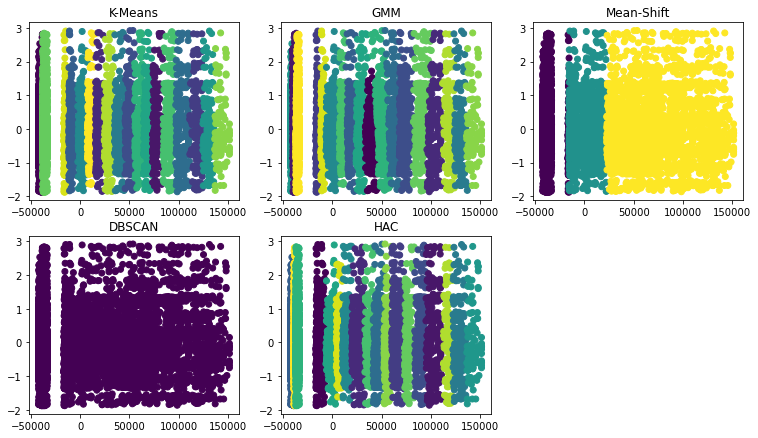

In [9]:
_,graphs = plt.subplots(2,3)  
graphs[1,2].set_axis_off()   

movies_pred = kmeans_model.fit_predict(pca_dataset)
graphs[0,0].scatter(pca_dataset[:,0], pca_dataset[:,1], c=movies_pred)
graphs[0,0].set_title("K-Means")

movies_pred = gmm_model.fit_predict(pca_dataset)
graphs[0,1].scatter(pca_dataset[:,0], pca_dataset[:,1], c=movies_pred)
graphs[0,1].set_title("GMM") 

movies_pred = ms_model.fit_predict(pca_dataset)
graphs[0,2].scatter(pca_dataset[:,0], pca_dataset[:,1], c=movies_pred)
graphs[0,2].set_title("Mean-Shift")

movies_pred = dbscan_model.fit_predict(pca_dataset)
graphs[1,0].scatter(pca_dataset[:,0], pca_dataset[:,1], c=movies_pred)
graphs[1,0].set_title("DBSCAN") 

movies_pred = hac_model.fit_predict(pca_dataset)
graphs[1,1].scatter(pca_dataset[:,0], pca_dataset[:,1], c=movies_pred)
graphs[1,1].set_title("HAC")

plt.gcf().set_size_inches((12.80,7.20), forward=False)
plt.savefig("../visualizations/clustering_models.png", bbox_inches='tight', dpi=100)
plt.show()   

## Results

Based on the scatter plots generated from the clustering models' predictions, it's apparent that the K-Means, GMM and HAC models were able to successfully find the desired number of clusters. The Mean-Shift and DBSCAN models, on the other hand, generated much fewer and only found three and one clusters, respectively. This difference in performance is most likely due to the relative proximities of the datapoints. That is, they are relatively closer together, such that there aren't any apparaent clusters from a visual standpoint, so the Mean-Shift and DBSCAN couldn't effectively determine how many clusters were present, hence why they both found noticeably fewer clusters compared to the other approaches. On the other hand, the K-Means, GMM and HAC were most likely able to perform better since they could be explicitly told the number of desired clusters (e.g. the n_clusters parameter when creating the models).

In the end, from the results gathered and displayed above, it can be said that the K-Means, GMM and HAC clustering approaches would be viable for finding similar movies based on the movies' average ratings and genres.